<h1 align=center>TP : Étude du K-NN sur un vrai jeu de données : Le MNIST </h1>

<h2 align=center> OpenClassrooms : CentraleSupélec Certifiyng Training</h2>

<h3 align=center>Jean Martial Tagro </h3>

Il s'agit d'un dataset très célèbre, appelé MNIST. Il est constitué d'un ensemble de 70000 images 28x28 pixels en noir et blanc annotées du chiffre correspondant (entre 0 et 9). L'objectif de ce jeu de données était de permettre à un ordinateur d'apprendre à reconnaître des nombres manuscrits automatiquement (pour lire des chèques par exemple). Ce dataset utilise des données réelles qui ont déjà été pré-traitées pour être plus facilement utilisables par un algorithme.
Un extrait du type d'images que l'on trouve dans le dataset MNIST :
### OBJECTIF : Entraîner un modèle qui sera capable de reconnaître les chiffres écrits sur ce type d'images.

![title](MNIST.png)

### 1. Obtention du dataset, déjà dans scikit-learn.datasets

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
# Le dataset principal qui contient toutes les images
print (mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)

(70000, 784)
(70000,)


In [4]:
# On remarque qu'on a des features multi-dimensionnels. Chaque image (entrée) Xi en ligne a 28x28=784 colonnes j X(i,j)
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
#Exemple affichage du 4e element (4e ligne de la matrice). Les valeurs des pixels 
#(non nul, entre 0(blanc) et 255(noir)) dessine une forme
print(mnist.data[4].shape)
mnist.data[4]

(784,)


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### 2. Sampling ou Echantillonage
On considère 70000 images trop grand pour notre machine. D'autant plus qu'on utilise le K-NN qui est très lent. On va échantilloner avec 5000 échantillons prelevés

In [51]:
import numpy as np

# generation aleatoire des 5000 echantillons de valeur (index) entre 0 et 70000
sample = np.random.randint(70000, size=5000)

# echantillonnage
data = mnist.data[sample]
target = mnist.target[sample]

In [52]:
# Check
data.shape

(5000, 784)

### 3. Training / Test set 

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8)

### 4. Application du K-NN

In [54]:
from sklearn import neighbors

model = neighbors.KNeighborsClassifier(n_neighbors = 3)

In [55]:
# on fitte
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [61]:
# test de prediction sur la 3e image du jeu de données x_test
model.predict([x_test[5]])

array(['2'], dtype=object)

In [62]:
# verification
y_test[5]

'2'

### 5. Evaluation du 3-NN

In [63]:
# BON ! Taux de prediction correct de 0.917
score = model.score(x_test, y_test)
score

0.933

In [64]:
# On peut afficher le taux d'erreur
taux_erreur = 1 - score
taux_erreur

0.06699999999999995

### 6. Optimisation de l'hyper-paramètre K

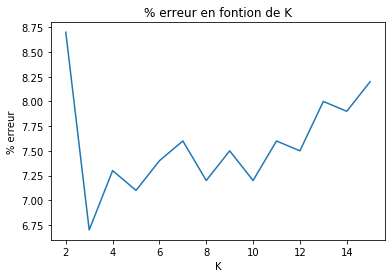

In [65]:
# On cherche à representer une courbe donnant l'erreur (en %) en fonction du K choisi. Test entre 2 et 15 
# N.P: La representation de la performance (la courbe) exacte dépend aussi le l'échantillon.

errors = []

for k in range(2,16):
    # cree le model knn de classification correspondant
    knn = neighbors.KNeighborsClassifier(k)
    # on calcule l'erreur correspondant qu'on met dans la liste
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
    
# visualisation
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('% erreur')
plt.title('% erreur en fontion de K')
plt.plot(range(2,16), errors)
plt.show()

Comme on peut le voir, le k-NN le plus performant est celui pour lequel k = 3. On connaît donc notre classifieur final optimal : 3-nn. Ce qui veut dire que c'est celui qui classifie le mieux les données, et qui donc dans ce cas précis reconnaît au mieux les nombres écrits à la main.

### 7. Affichage des prédictions du meilleur classifieur dans notre cas : le 3-NN

In [68]:
# on le recupère
knn3 = neighbors.KNeighborsClassifier(3)

In [69]:
# On le fitte et on recupere les predictions 
knn3.fit(x_train, y_train)
predictions = knn5.predict(x_test)

On cherche maintenant à les afficher sous forme d'image et non de vecteurs matriciels; avec imshow de pyplot
On affichera donc plusieurs images dans le graphe. On se limite à 12 predictions choisies aléatoirement.
L'objet ici est de :
- créer le graphe avec 12 sous-parties (subplot)
- afficher les 12 images aleatoires issues de x_test et leur prédiction en titre

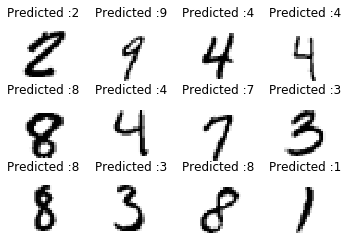

In [70]:
# On redimensionne la matrice x_test (1000x784) sous forme d'image 28x28 sur les 1000 lignes
images = x_test.reshape((-1, 28, 28))

# generation aleatoire des 12 index de valeur entre 0 et taille (lignes de x_test ==1000)
sample12 = np.random.randint(images.shape[0], size=12)

# On crée un graphique fixe avec nos 12 places pour nos schémas, sur ici 3x4
fig,ax = plt.subplots(3,4)

# On boucle pour afficher les images et leur prédictions

for index, value in enumerate(sample12):
    
    plt.subplot(3,4,index+1) # on place le sous-graphique à une nouvelle position
    plt.axis('off') # supprimer les axes
    plt.imshow(images[value], cmap=plt.cm.gray_r, interpolation='nearest') # 'cmap=plt.cm.gray_r' pour del les fonds
    plt.title('Predicted :{}'.format(predictions[value]))
    
plt.show()

<b> Pourquoi le '-1' ? </b>

From https://stackoverflow.com/questions/41848660/why-the-negative-reshape-1-in-mnist-tutorial/41848962

x_image = tf.reshape(x, [-1,28,28,1])

Here -1 for input x specifies that this dimension should be dynamically computed based on the number of input values in x, holding the size of all other dimensions constant. This allows us to treat batch_size(parameter with value -1) as a hyperparameter that we can tune.

### 8. Affichons les predictions érronées pour mieux comprendre les erreurs

Prédictions érronées : 


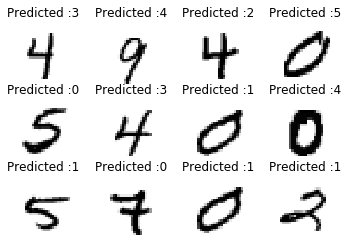

In [74]:
# on recupère les predictions erronées et prend aleatoirement un echantillon d'index de taille 12
prediction_errors = predictions[predictions != y_test]

# On prend aleatoirement 12 index où les predictions sont erronées
echant = np.random.randint(prediction_errors.shape[0], size=12)

fig,ax = plt.subplots(3,4)

print("Prédictions érronées : ")

for index, value in enumerate(echant):
    #print(index)
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value], cmap=plt.cm.gray_r, interpolation='nearest') # 'cmap=plt.cm.gray_r' pour del les fonds
    plt.title('Predicted :{}'.format(prediction_errors[value]))
    
plt.show()

On note bien qu'ici toutes les prédictions sont fausses.

---